<a href="https://colab.research.google.com/github/sayhihakim/Data-Science/blob/main/Google_Play_Store_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imorting the Import Python modules for our project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_store = pd.read_csv("/googleplaystore.csv")


In [ ]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df_store.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

#generate descriptivr statistics of numerical calumns


In [ ]:

df_store.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Hadding Missing Values

In [ ]:
df_store.dropna (inplace=True)

Dealing with Duplicatis
Remove duplicatis rows


In [ ]:
df_store.drop_duplicates(inplace=True)

In [ ]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


In [ ]:
df_store.duplicated().sum()


0

Removing Outliers   

In [ ]:
z_scores = np.abs((df_store['Rating']- df_store['Rating'].mean()) / df_store['Rating'].std())
df_store = df_store[z_scores < 3]

In [ ]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8714 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8714 non-null   object 
 1   Category        8714 non-null   object 
 2   Rating          8714 non-null   float64
 3   Reviews         8714 non-null   object 
 4   Size            8714 non-null   object 
 5   Installs        8714 non-null   object 
 6   Type            8714 non-null   object 
 7   Price           8714 non-null   object 
 8   Content Rating  8714 non-null   object 
 9   Genres          8714 non-null   object 
 10  Last Updated    8714 non-null   object 
 11  Current Ver     8714 non-null   object 
 12  Android Ver     8714 non-null   object 
dtypes: float64(1), object(12)
memory usage: 953.1+ KB


Change the data type of installs column to numrical data type and remove to commma and the plus symbols :


In [ ]:
df_store['Installs'] = df_store['Installs'].str.replace('+','') # Remove '+' sign
df_store['Installs'] = df_store['Installs'].str.replace(',','') # Remove ',' sign

df_store['Installs'] = df_store['Installs'].astype(int) #convert  data type to int

#Change the data type of Reviews column to numrical data type :
df_store['Reviews'] = df_store['Reviews'].astype(int) #convert data type to int +

<ipython-input-26-5efb275dc712>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_store['Installs'] = df_store['Installs'].str.replace('+','') # Remove '+' sign


In [ ]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Text(0.5, 1.0, 'Distribution of app Categories')

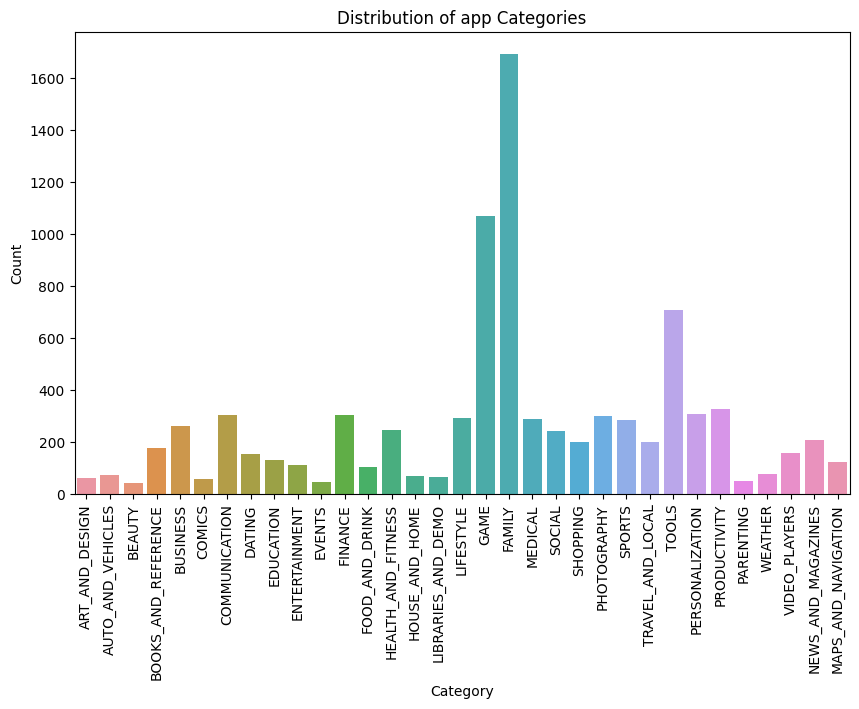

In [ ]:
#Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_store, x='Category')
plt.xlabel('Category')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Distribution of app Categories')

Scatter Plot


Text(0.5, 1.0, 'Relationship between Reviwes and Reting ')

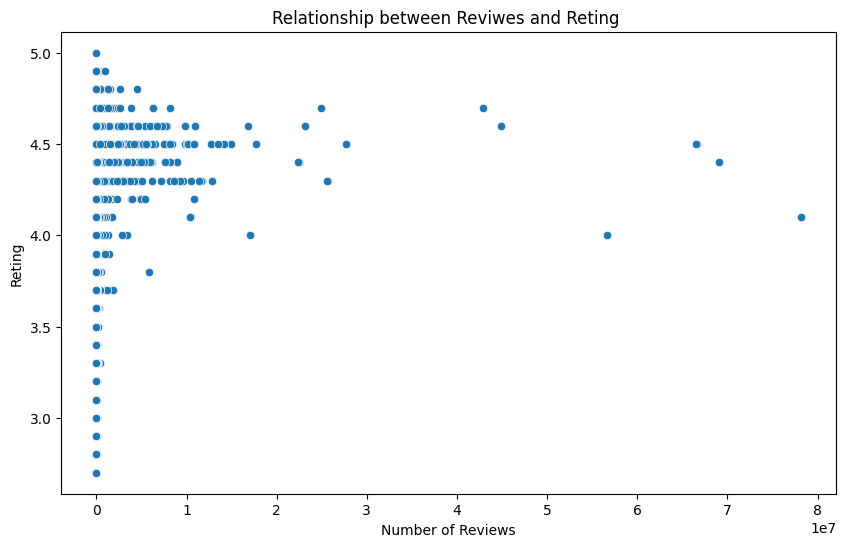

In [ ]:
plt.figure(figsize =(10, 6))
sns.scatterplot(data=df_store, x='Reviews', y='Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Reting')
plt.title('Relationship between Reviwes and Reting ')

Box Plot


Text(0.5, 1.0, 'Distribution of installs across Categories')

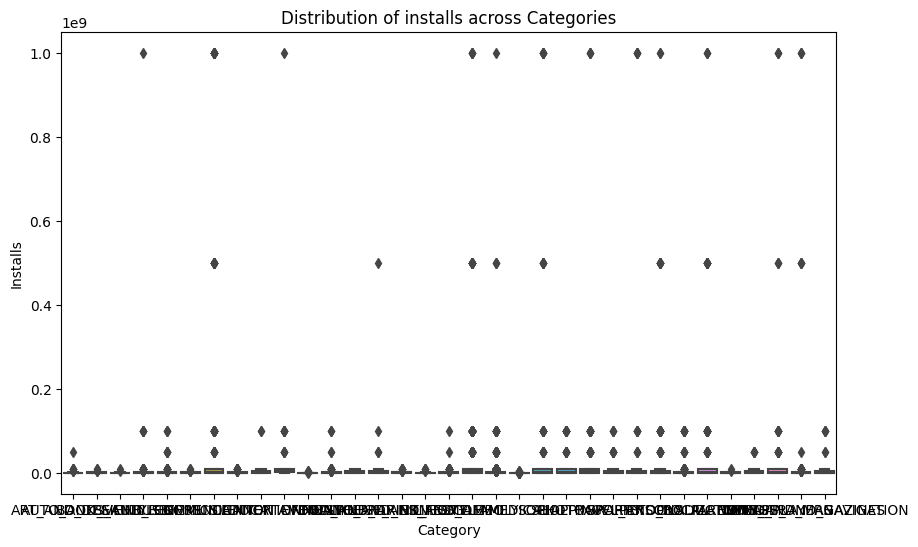

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_store, x='Category', y='Installs')
plt.xlabel('Category')
plt.ylabel('Installs')
plt.title('Distribution of installs across Categories')

In [ ]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
from scipy.stats import ttest_ind


splitting the dataset into free and paid apps

In [ ]:
free_apps = df_store[df_store['Type'] == 'Free']
paid_apps = df_store[df_store['Type'] == 'Paid']

Performing t-test


In [ ]:
t_stat, p_value = ttest_ind(free_apps['Rating'], paid_apps['Rating'])
p_value

6.283203579258039e-06

Cheking the p_value

In [ ]:
if p_value <0.05 :
  print("Reject null hypothesis : three is a singifcation difference in ratings.")
else:
    print("Fail to reject null hypothesis : there is no singifcation difference in ratings.")

Reject null hypothesis : three is a singifcation difference in ratings.


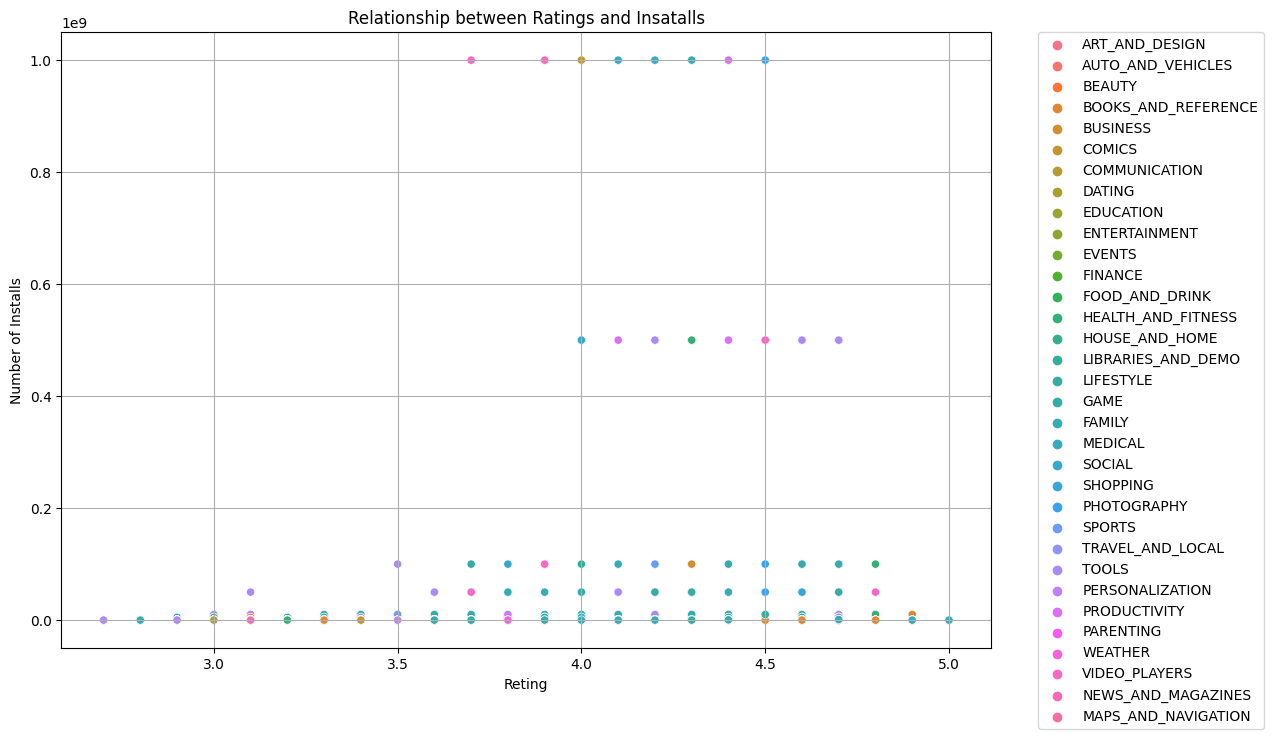

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_store, x='Rating', y='Installs', hue='Category')
plt.grid(True)
plt.xlabel('Reting')
plt.ylabel('Number of Installs')
plt.title('Relationship between Ratings and Insatalls')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad=0. )
plt.show()

line plot of Average Rating over Time


Text(0.5, 1.0, 'Avetage Rating Trend over Time')

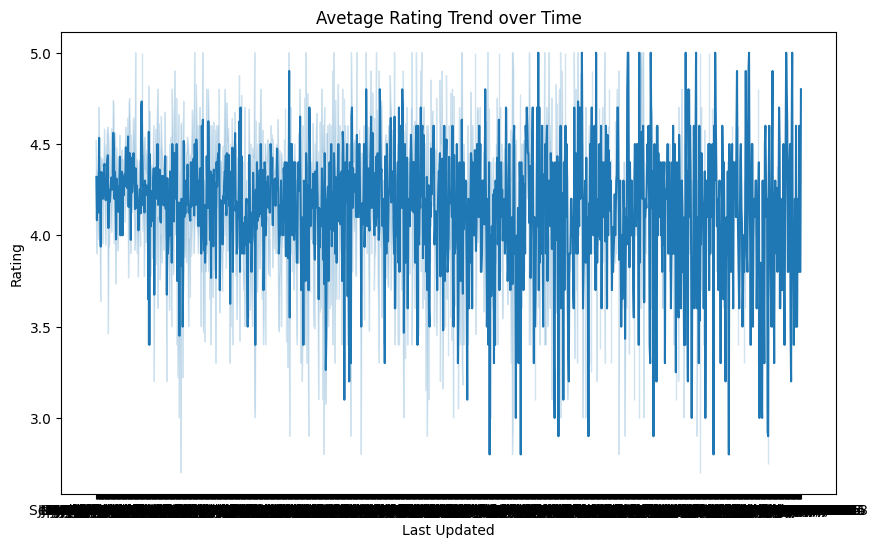

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_store, x='Last Updated', y='Rating')
plt.xlabel('Last Updated')
plt.ylabel('Rating')
plt.title('Avetage Rating Trend over Time')

In [ ]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Convert 'Last Updated' to datetime

```
# Ce texte est au format code
```



In [ ]:
df_store['Last Updated'] = pd.to_datetime(df_store['Last Updated'])


Set 'Last Updated'as the index

In [ ]:
df_store.set_index('Last Updated', inplace=True)


Resample 'Reating' to monthly frequency

In [ ]:
df_store_monthly = df_store['Rating'].resample('M').mean()


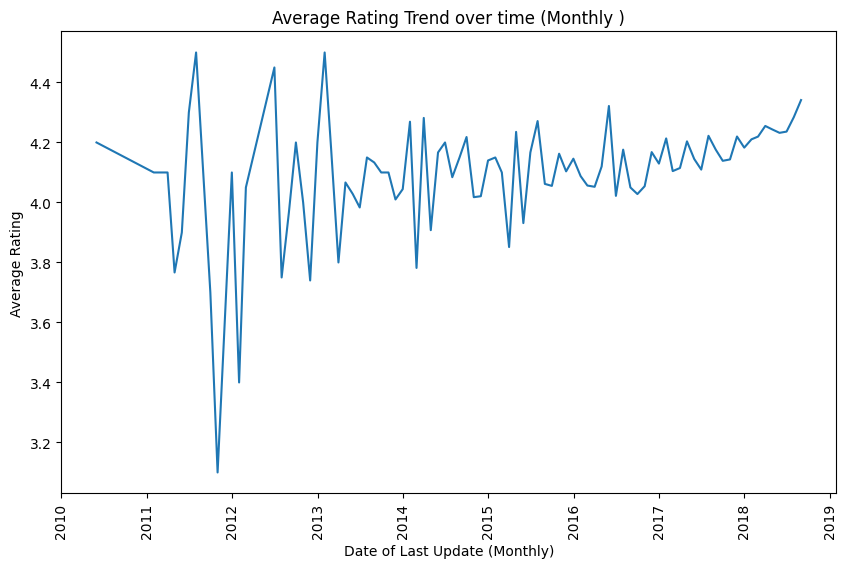

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_store_monthly)
plt.xlabel('Date of Last Update (Monthly)')
plt.xticks(rotation=90)
plt.ylabel('Average Rating')
plt.title('Average Rating Trend over time (Monthly )')
plt.show()